**GOOGLE DATA ANALYSIS CAPSTONE PROJECT. CASE STUDY: BELLA BEAT**



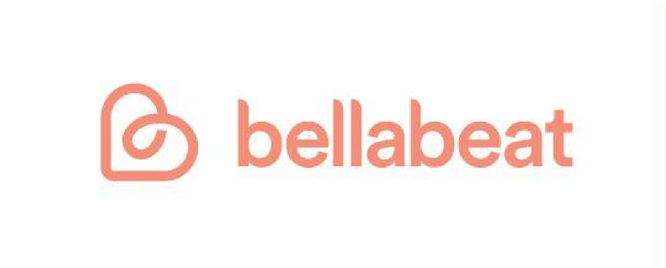





**TABLE OF CONTENTS**
 
 1. Summary
 2. Ask:
 
     a) Business tasks
     
     b)Identify Stakeholders
     
 3. Prepare 
 
     a)About dataset.
     
     b)How is data organized?
     
     c)Data Limitation
     
  
 4. Process
 
     a)Choose your tools 
     
     b)Import dataset
     
     c)Preview dataset
     
     d)Clean and transform data
     
            * Identify unique users in dataset 
      
            * Find duplicates and drop them 
       
            * Clean and rename table names 
       
            * Format date_time 
       
       
 5. Analyze and Share
 
     a) Summary
 
     b) Merge Data
     
     c) Plotting explorations
 
 6. Act
 
     a)Recommendations.
     

**SUMMARY**

Bellabeat is a high-tech company that manufactures health-focused smart products for women. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits.  

Bellabeat has a wide range of products but on this study we will be focusing on Bellabeat App.
The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products. 

**ASK**

**Business Task**

Gain insight into how consumers use non-Bellabeat smart devices and apply these insights to help influence Bellabeat marketing strategy.

**Identify Key Stakeholders:**

Urška Sršen: Bellabeat’s cofounder and Chief Creative Oﬃcer.

Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.

Bellabeat's marketing team.


**PREPARE**

**About Dataset**

The dataset we will be using for this study is the FitBit Fitness Tracker Data that was gotten from Kaggle. These files contains personal fitness tracker from thirty fitbit users who consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. 

This means that the data we are about to use is open data which can be used and re-used by the public. It was made available through Mobius.


**How is data organized?**

The dataset includes 18 csv files that contains quantitative data and is organized in a long format as there as various rows containing different variables about a particular user.

**Data Limitation**

This data set was made available through a third party and this is the first limitation of this dataset. Also, the data set includes data from just thirty participants. Because of how small the sample size is, this may lead to sampling bias.




**PROCESS**

Because we are focusing on the product 'Bellabeat App' which provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits, I have selected the following datasets out of the 18 csv files

* dailyActivity_merged

* dailyCalories_merged

* dailyIntensities_merged

* dailySteps_merged

* sleepDay_merged

* hourlyIntensities_merged

**Choose your tools**

I have decided to use R programming language for the analysis and visualizations. 
First off, I will install all necessary packages and datasets needed for this study.


In [1]:
library(tidyverse)
library(skimr)
library(dplyr)
library(janitor)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**Import Dataset**

Then I will import the datasets chosen for this study.

In [2]:
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

**View Dataset**

Next, we will preview our datasets to determine the data types contained there in.

In [3]:
head(daily_activity)
head(daily_calories)
head(daily_intensities)
head(daily_steps)
head(daily_sleep)
head(hourly_intensities)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


After previewing the data, I noticed the data in dailly_intensities, daily_calories and daily_steps are already recorded in the daily_activity table so we will move forward without those tables.

**Clean and transform data**

Next, we will get rid of error and inadequacies in our dataset. 

The first step is to verify the number of users we have in each data frame.

In [4]:
n_unique(daily_activity$Id)
n_unique(daily_sleep$Id)
n_unique(hourly_intensities$Id)

[1] 33

[1] 24

[1] 33

**Find Duplicates and drop**

We will now look for any duplicates in the dataset.

In [5]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_intensities))

[1] 0

[1] 3

[1] 0

We found 3 duplicates in the daily_sleep data set and now we will remove them. 

In [6]:
daily_sleep <- daily_sleep %>%
distinct() %>%
drop_na()

Lets do a qucik check to verify that duplicates in daily_sleep has been dropped

In [7]:
sum(duplicated(daily_sleep))

[1] 0

**Clean and rename columns**

To maintain consistency because we will have to type the column names over and over, we will change the format of our column names to lowercase. This is also important for when we want to merge our datasets.

In [8]:
clean_names(daily_activity)
daily_activity <- rename_with(daily_activity,tolower)
clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep,tolower)
clean_names(hourly_intensities)
hourly_intensities <- rename_with(hourly_intensities,tolower)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_hour,total_intensity,average_intensity
<dbl>,<chr>,<int>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000
1503960366,4/12/2016 6:00:00 AM,0,0.000000
1503960366,4/12/2016 7:00:00 AM,0,0.000000
1503960366,4/12/2016 8:00:00 AM,13,0.216667


**Formatting date_time columns**

Column names have been cleaned and verified. We also do not have any duplictaes, therefore the next cause of action is to format date and time to make sure it's consistent throughout the tables. We will format the datasets to just dates thereby disregarding the time in the date_time column on daily_sleep.

However, we will maintain the date_time column in hourly intensities so we can use that dataset for other explorations where we will include time.

In [9]:
daily_activity <- daily_activity %>% 
rename(date = activitydate) %>% 
mutate(date = as_date(date, format = "%m/%d/%Y" ))


daily_sleep <- daily_sleep %>%
rename(date = sleepday) %>%
mutate(date = as_date(date, format = "%m/%d/%y"))

We will now preview the datasets to confirm the dates have been properly formatted.

In [10]:
head(daily_activity)
head(daily_sleep)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2020-04-12,1,327,346
2,1503960366,2020-04-13,2,384,407
3,1503960366,2020-04-15,1,412,442
4,1503960366,2020-04-16,2,340,367
5,1503960366,2020-04-17,1,700,712
6,1503960366,2020-04-19,1,304,320


**ANALYZE AND SHARE**

**Summarize Data**


First of all, let's see a summary view of all the tables.

In [11]:
daily_activity %>%
select(sedentaryminutes, lightlyactiveminutes, fairlyactiveminutes, veryactiveminutes) %>%
summary()

daily_activity %>%
select(totalsteps, totaldistance, calories) %>%
summary()

daily_sleep %>%
select(totalsleeprecords, totalminutesasleep, totaltimeinbed) %>%
summary()

hourly_intensities %>%
select(totalintensity, averageintensity) %>%
summary()

 sedentaryminutes lightlyactiveminutes fairlyactiveminutes veryactiveminutes
 Min.   :   0.0   Min.   :  0.0        Min.   :  0.00      Min.   :  0.00   
 1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:  0.00      1st Qu.:  0.00   
 Median :1057.5   Median :199.0        Median :  6.00      Median :  4.00   
 Mean   : 991.2   Mean   :192.8        Mean   : 13.56      Mean   : 21.16   
 3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.: 19.00      3rd Qu.: 32.00   
 Max.   :1440.0   Max.   :518.0        Max.   :143.00      Max.   :210.00   

   totalsteps    totaldistance       calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

 totalsleeprecords totalminutesasleep totaltimeinbed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

 totalintensity   averageintensity
 Min.   :  0.00   Min.   :0.0000  
 1st Qu.:  0.00   1st Qu.:0.0000  
 Median :  3.00   Median :0.0500  
 Mean   : 12.04   Mean   :0.2006  
 3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :180.00   Max.   :3.0000  

***There's already some interesting discoveries from this summary which we will explore below;***

1. Average sedentary minutes among users are extremely high (991) compared to average veryactive minutes(21)

2. Most users sleep only once a day and the average sleep time is 419 minutes which is 6.9 hours.

3. Users spend more time in bed than they do asleep. Maximum time asleep is 796 minutes while maximum time in bed is 961 minutes. 

**Merge Data**

We will now merge both (daily_activity and daily_sleep) datasets on column Id and date to have one dataset we can visualize from.

In [12]:
activity_sleep <- merge(daily_activity, daily_sleep, by="id")

Let's view the merged dataset

In [13]:
head(activity_sleep)

,id,date.x,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,date.y,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>,<int>,<int>,<int>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,2020-04-12,1,327,346
2,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,2020-04-13,2,384,407
3,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,2020-04-15,1,412,442
4,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,2020-04-16,2,340,367
5,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,2020-04-17,1,700,712
6,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,2020-04-19,1,304,320



**Plotting a few explorations**

From the merged data we will explore and plot some data visualizations to help us find trends and properly analyze the data.

First, we will be exploring the variables totalminutesasleep and totaltimeinbed. Let's see if there is any unexpected trend.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



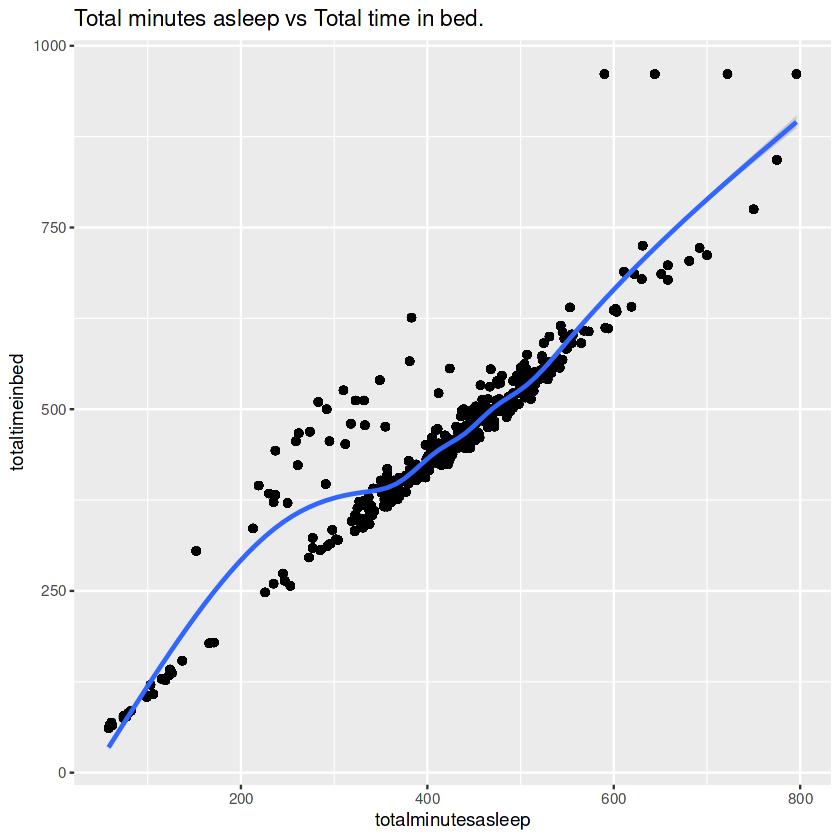

In [14]:
ggplot(data = activity_sleep) + geom_point(mapping = aes( x= totalminutesasleep, y = totaltimeinbed)) + geom_smooth(mapping = aes( x= totalminutesasleep, y = totaltimeinbed)) + labs(title = "Total minutes asleep vs Total time in bed.") 

This visualization expresses a positive corelation between the total minutes users are asleep and total time they spend in bed i.e the more minutes users spend asleep, the more time they spend in bed. 

We already established users spend more than in bed than the total minutes they're asleep and this has been proven by studies to be unhealthy. One of such studies is linked below: https://www.healthcentral.com/article/spend-less-time-in-bed-if-you-want-more-sleep

****The Bellabeat app can include a feature that provides an alarm to wake users after their average sleep time has elasped with follow up notifications reminding them to spend less time in bed. ****

Let's explore the relationship between very active minutes and total minutes asleep.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



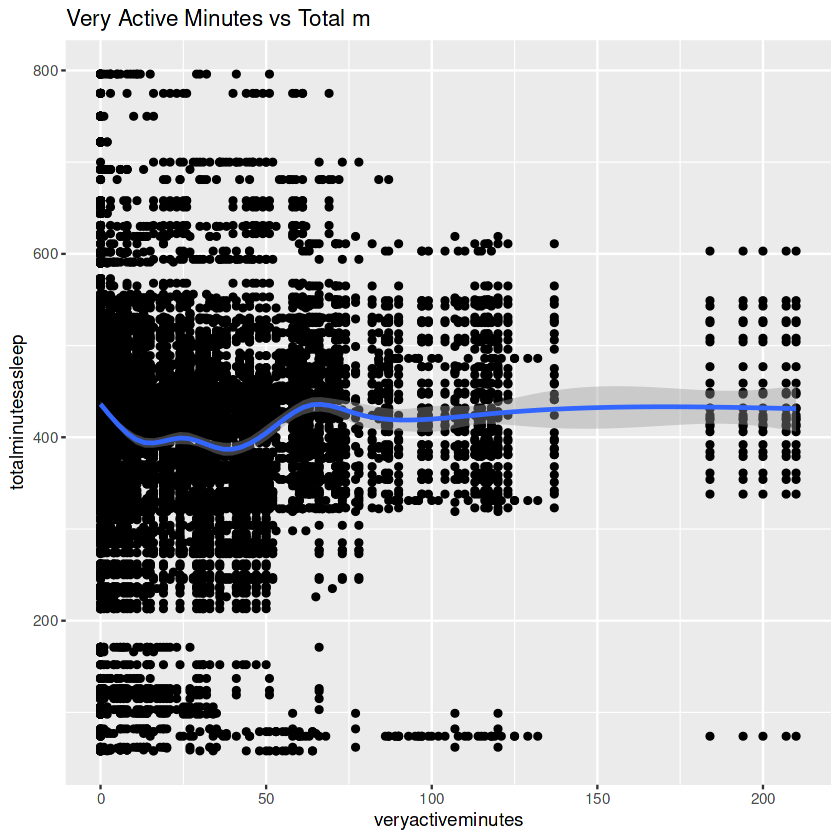

In [15]:
ggplot(data = activity_sleep, aes(x=veryactiveminutes, y=totalminutesasleep)) + geom_point() + geom_smooth() + labs(title = 'Very Active Minutes vs Total m')

There is no correlation between very active minutes and minutes spent sleeping in a day.

Next, we will try to find the relationship *(if any)* between totalsteps and calories and what this might mean for Bellabeat app users. We will use the daily_activity dataset for this plot.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



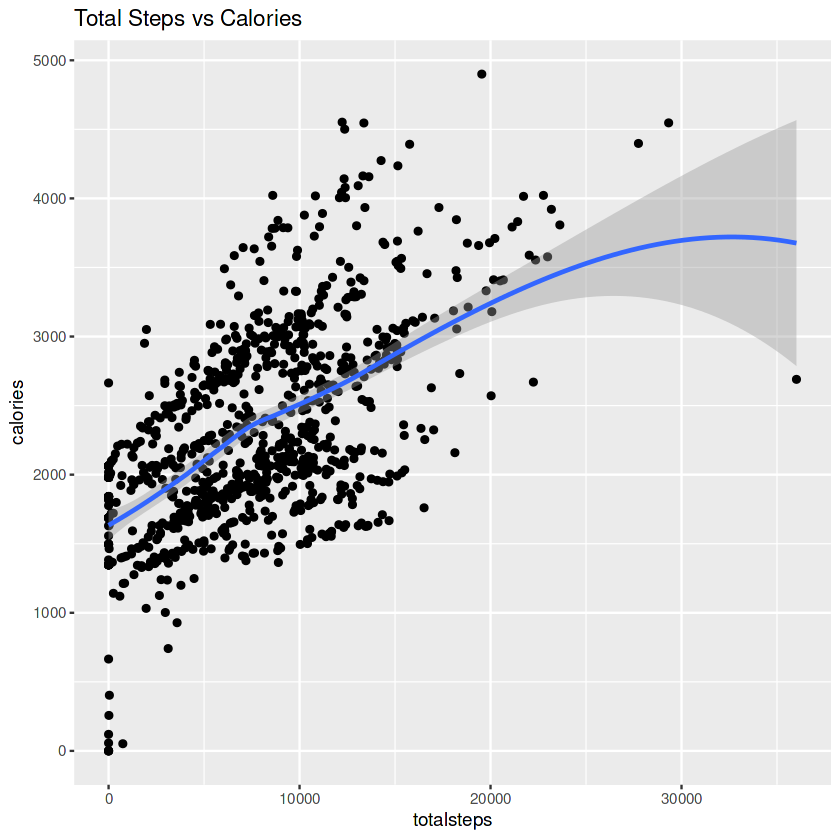

In [16]:
ggplot(daily_activity,aes(x = totalsteps, y = calories)) + geom_point () + geom_smooth() + labs(title = 'Total Steps vs Calories')

From the above visualization, there's a positive corelation between calories and total steps. As expected, the more steps we take, the more calories we burn. 

***Bellabeat users should be encouraged to be more active in order to burn more calories.***

We have established that there's a positive relationship between totalsteps and calories. Now let us determine the relationship between totalsteps and veryactiveminutes.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



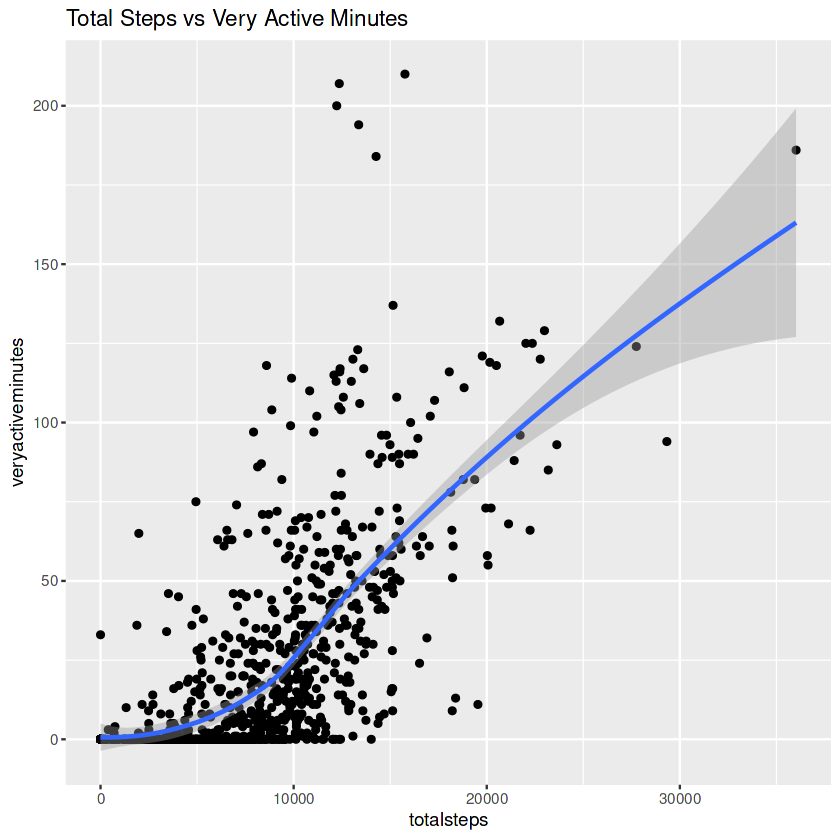

In [17]:
ggplot(data = daily_activity,aes(x=totalsteps , y=veryactiveminutes)) + geom_point() + geom_smooth() + labs(title = 'Total Steps vs Very Active Minutes')

There's a positive relationship between total steps and very active minutes so we can confirm that the users who take more steps are the very active users. Therefore more active minutes will lead to burning more calories.

Let's look at the relationship between Sedentary minutes and Calories.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



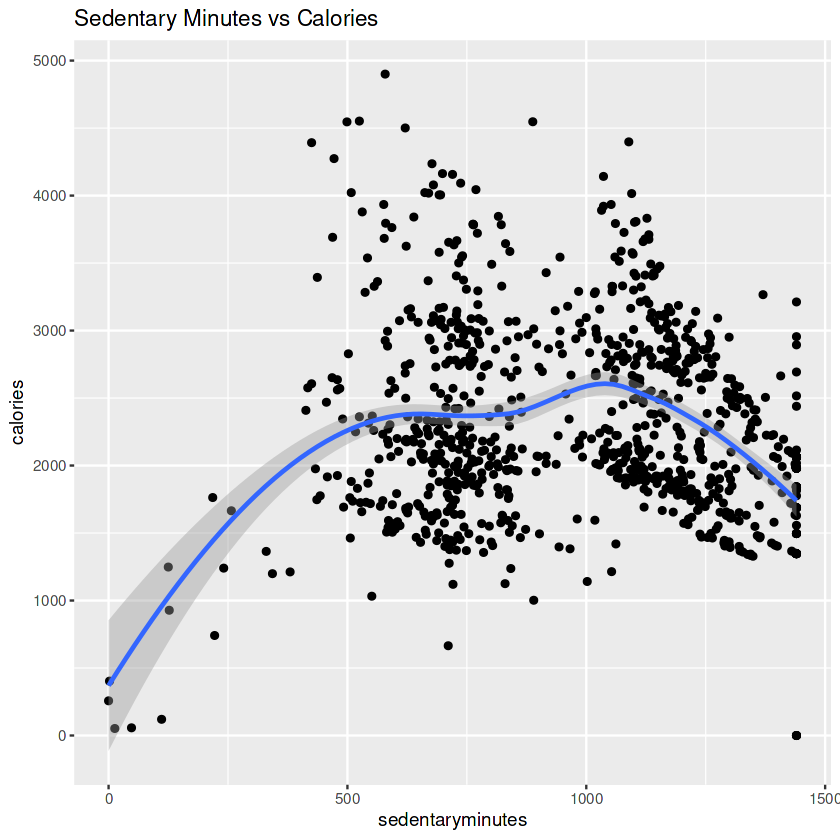

In [18]:
ggplot(daily_activity, aes(x = sedentaryminutes, y = calories)) + geom_point() + geom_smooth() +labs(title = 'Sedentary Minutes vs Calories') 

This plot shows there is no corelation between sedentary minutes and calories.

Let's identify the relationship between total steps and sleep time.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



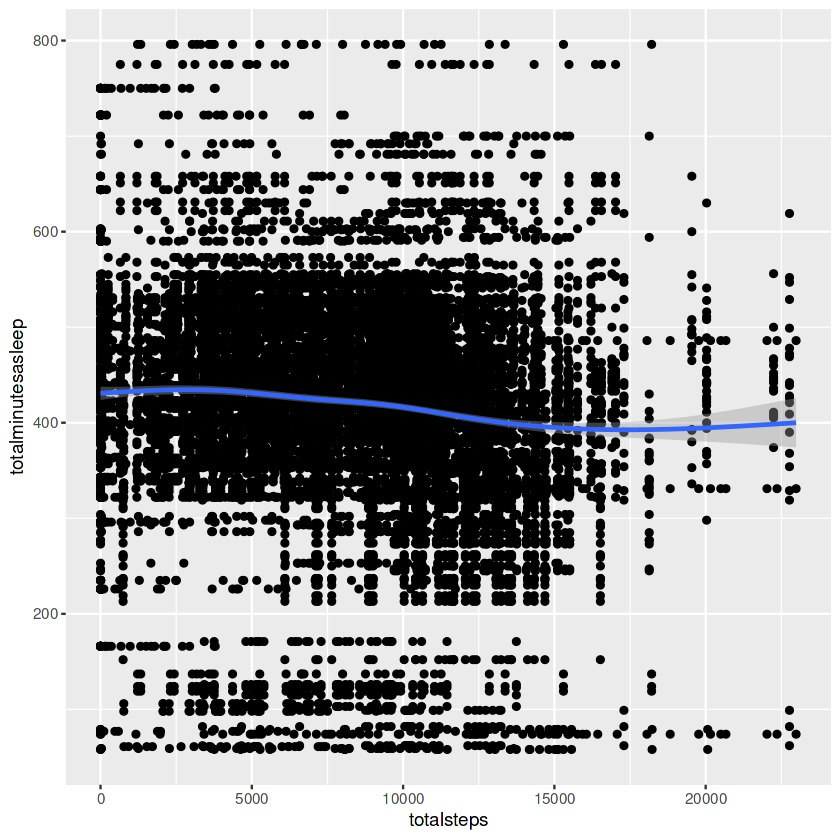

In [19]:
ggplot(data = activity_sleep, aes(x = totalsteps, y = totalminutesasleep)) + geom_point() + geom_smooth()

This suggests that there is no relationship between total steps and the total amounts of minutes spents asleep.

Let's determine what time in a day users are most active. For this step, we will be using the hourly_intensities dataset which includes date_time.

Before we plot, we will have to separate the activityhour column to date and time.

In [20]:
hourly_intensities$activityhour <- parse_date_time(hourly_intensities$activityhour, "%d/%m/%y %I:%M:%S %p")

hourly_intensities$date <- as.Date(hourly_intensities$activityhour, format = "%d/%m/%y")

hourly_intensities$time <- format(as.POSIXct(hourly_intensities$activityhour), format = "%H:%M:%S")

head(hourly_intensities)

Warning message:
“ 13821 failed to parse.”


,id,activityhour,totalintensity,averageintensity,date,time
,<dbl>,<dttm>,<int>,<dbl>,<date>,<chr>
1,1503960366,2016-12-04 00:00:00,20,0.333333,2016-12-04,00:00:00
2,1503960366,2016-12-04 01:00:00,8,0.133333,2016-12-04,01:00:00
3,1503960366,2016-12-04 02:00:00,7,0.116667,2016-12-04,02:00:00
4,1503960366,2016-12-04 03:00:00,0,0.000000,2016-12-04,03:00:00
5,1503960366,2016-12-04 04:00:00,0,0.000000,2016-12-04,04:00:00
6,1503960366,2016-12-04 05:00:00,0,0.000000,2016-12-04,05:00:00


Now let's determine the relationship the time and totalintensity.

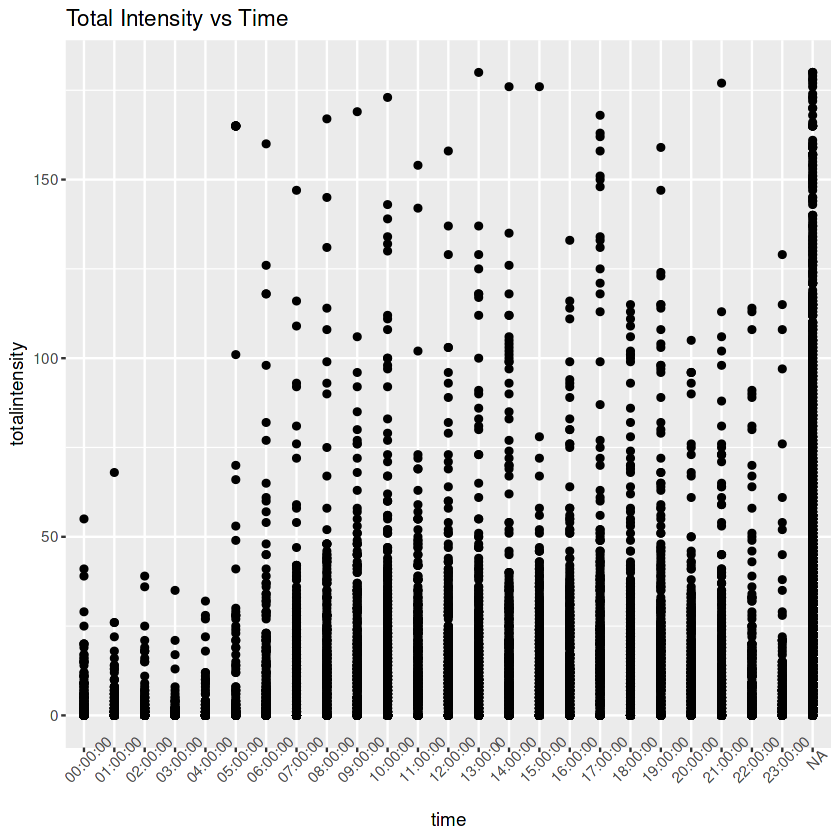

In [21]:
ggplot(data=hourly_intensities,aes(x=time,y=totalintensity)) + geom_point() + theme(axis.text.x = element_text(angle = 45)) + labs(title = 'Total Intensity vs Time')

From the plot above we have determined that user's most active hours in the day is between 5am and 10pm. 8am in the mornings and 5-6pm in the evenings. This means that most of our users work a 9-5 and are subject to a sedentary/office lifestyle.

**ACT**

**Recommendations**

Bellabeat takes pride in offering consumers accurate information about their sleep, activity levels, calories, and other factors so they may make wise decisions regarding their health. I have learned a few things from studying the Fitbit fitness tracker data, but I must stress that this dataset was only a tiny sample, and it might not accurately reflect how the variables are distributed among women.

The Bellabeat app should include an interactive component that enables users to enter and engage with personal health data. This will be beneficial in providing more accurate data for future analysis. 


The marketing plan for Bellabeat, and more specifically the Bellabeat App, may be influenced by the following suggestions.

1. ***Users should receive daily notifications to increase steps and active minutes***. 

We discovered that users who did more steps burned more calories from the plot "Total Steps vs. Calories." Users should be made aware of the many advantages of burning more calories so that they will be motivated to raise their number of active minutes (as we established a positive relationship between total steps and very active minutes).

The Centers for Disease Control and Prevention states that  an average of  8,000 steps per day is linked to a 51% decreased risk for mortality from all causes, while our users average 7638 steps each day. In order to maximize health benefits, users should be urged to take more steps.

Another thing to keep in mind in this regard is that the plot of "Total Intensity vs. Time" led us to conclude that our users lead sedentary lifestyles, which are unhealthy for them. In order to maximize health benefits users should be encouraged to increase active minutes or allocate 30 to 1 hour each day to physical activity.

2. ***Users should receive daily notifications and alarms about sleeping time.*** 

To improve sleep the Bellabeat app should include a function that sends notifications to users to sleep when tired and alarms to wake users after averaging normal sleeping time. Users should be made aware of the negative effects of staying longer in bed after you wake up.

3. ***Users should receive rewards***


Rewards for users who reach milestones like walking 8,000 steps per day are necessary to increase app usage and engagement. Rewards like lower subscription rates will serve as incentive to walk more and individualized health coaching will motivate and enhance their journey to better health.




P.s: This is my first data analysis project ever. I would value feedback on how i can get better. Thanks.